### 목표설정
- 버섯의 특징을 활용해서 독/식용 버섯 구분
- 결정트리 시각화/ 과대적합 속성을 제어(튜닝)
- 특징 선택하기

In [1]:
data_file = '/content/drive/MyDrive/폴리텍전남캠퍼스/data/mushrooms.csv'

In [2]:
import pandas as pd
data = pd.read_csv(data_file)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
data.shape

(8124, 23)

### 문제,답지 분리
- y = ax + b
- iloc[행시작:행끝,열시작:열끝]
- X(문제) : iloc,loc
- y(답지) : iloc,loc

In [6]:
X = data.iloc[:,1:] # 문제
#X = data.loc[:,'cap-shape':] # 문제
y = data.iloc[:,0] # 답지
#y = data.loc[:,'class'] # 답지

In [7]:
print(data.shape,X.shape,y.shape)

(8124, 23) (8124, 22) (8124,)


In [8]:
# X['cap-shape'].value_counts()
# 컬럼에 답종류 및 카운트
X['habitat'].value_counts()

habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64

In [9]:
#  답종류만 보여주세요
X['habitat'].unique()

array(['u', 'g', 'm', 'd', 'p', 'w', 'l'], dtype=object)

### 원핫인코딩
- 문자를 숫자로 변형시켜주는 함수
 - 범주형 -> 수치형으로 변환
- 문자로 학습할 수 없기 때문에 숫자로 변형해줘야함

In [10]:
# pd.get_dummies(X) : X에 들어있는 모든 특징들을 원핫인코딩 해주세요
# astype('int'): 원핫인코딩된 값들을 숫자로 타입을 변경해주세요
X_ohe = pd.get_dummies(X).astype('int')
X_ohe

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [11]:
print('X원본: ', X.shape, 'X 원핫: ', X_ohe.shape)

X원본:  (8124, 22) X 원핫:  (8124, 117)


### LabelEncoding(라벨인코딩)

In [12]:
X['bruises'].unique()

array(['t', 'f'], dtype=object)

In [13]:
# 딕셔너리로 문자를 숫자로 바꿔주는것(맵핑)
bruises_map = {'t':1,'f':0}

In [14]:
bruises_map

{'t': 1, 'f': 0}

In [15]:
X['bruises'].map(bruises_map)

0       1
1       1
2       1
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: bruises, Length: 8124, dtype: int64

### 데이터 분활
- train,test 데이터 분활
- train_test_split(문제,답지,test_size,random_state)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X_ohe,y,test_size=0.2,random_state=42)

In [18]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (6499, 117)
y_train (6499,)
X_test (1625, 117)
y_test (1625,)


In [19]:
# 모델 만들기
from sklearn.tree import DecisionTreeClassifier

In [20]:
# 모델 객체 생성
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

In [21]:
# 모델 학습
tree_model.fit(X_train ,y_train)

DecisionTreeClassifier()

In [22]:
# 모델 성능 평가
# score(문제데이터,답지데이터)
score = tree_model.score(X_test,y_test)
score # 0~1로 표현


1.0

In [23]:
# 모델 예측 X_test : 1625
pre = tree_model.predict(X_test)

In [24]:
pre # 예측답지

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

In [25]:
y_test # 실제답지

1971    e
6654    p
5606    p
3332    e
6988    p
       ..
7374    p
1149    e
4999    p
7497    p
3341    p
Name: class, Length: 1625, dtype: object

In [26]:
# 정확도 확인 , accuracy_score(실제답지,예측답지)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,pre) # 0 ~ 1.0
score


1.0

### Tree 구조 시각화
- graphviz 라이브러리 설치

In [27]:
pip install graphviz

In [28]:
import graphviz

In [29]:
X_ohe.columns

Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=117)

In [30]:
# 출력파일 만들기
from sklearn.tree import export_graphviz

export_graphviz(
    tree_model, # 학습된 모델이름
    out_file='tree.dot', # 출력파일 이름
    class_names=['독버섯','식용버섯'], # 답지이름
    feature_names=X_ohe.columns, # 특징의 이름
    impurity = True, # 불순도(gini) 출력
    filled = True # 노드의 색상 출력
)

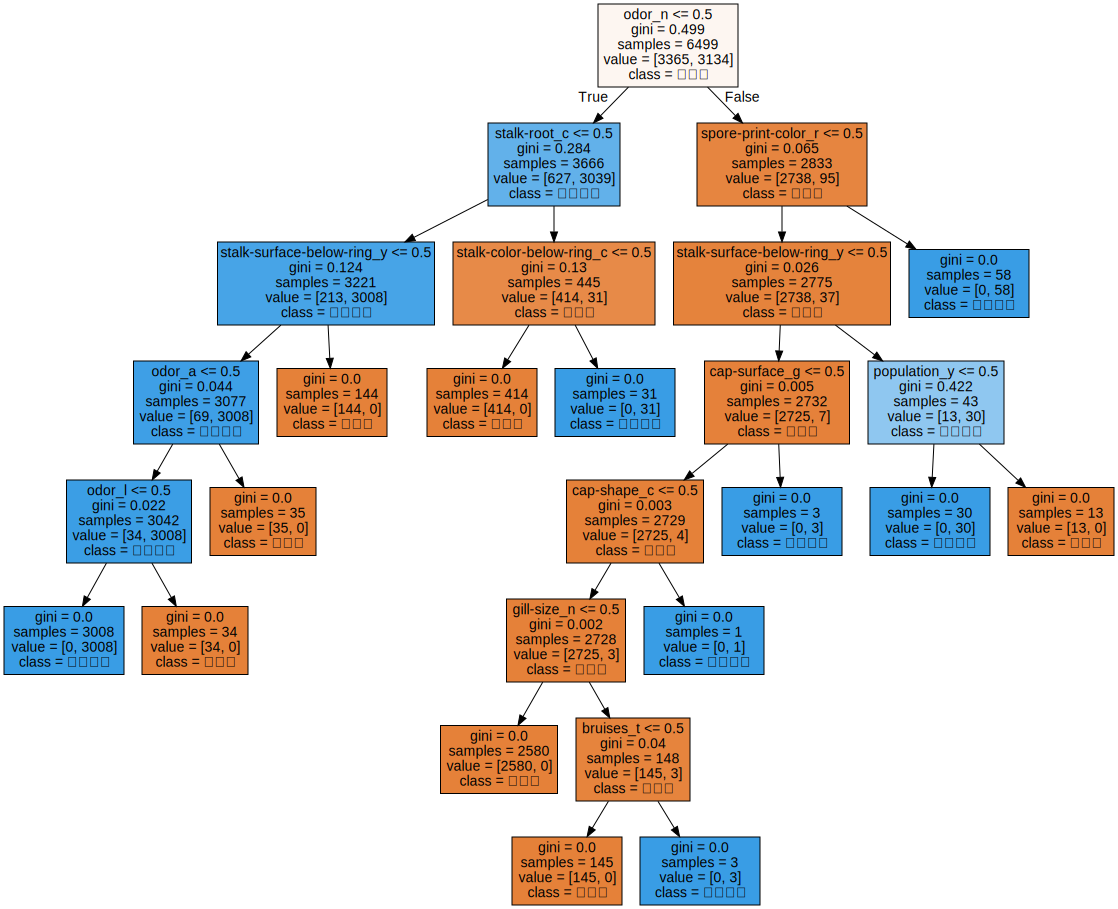

In [31]:
# 모델 출력하기

with open('/content/tree.dot', encoding='UTF8') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 과대적합 제어(하이퍼 파라미터 튜닝)
- max_depth: 트리의 깊이 제어

In [32]:
# max_depth 모델 깊이 제한
tree_model2 = DecisionTreeClassifier(max_depth=3)

In [34]:
import numpy as np
# 교차검증
from sklearn.model_selection import cross_val_score
result = cross_val_score(tree_model2,X_train,y_train, cv=5)
print(np.round(result.mean()*100,2))

98.6


In [35]:
# 모델 학습
tree_model2.fit(X_train ,y_train)

DecisionTreeClassifier(max_depth=3)

In [36]:
import numpy as np
score = tree_model2.score(X_test,y_test)
print(np.round(score*100,2)) # 0~1로 표현
pre = tree_model2.predict(X_test)
# pre

98.09


In [37]:
export_graphviz(
    tree_model2, # 학습된 모델이름
    out_file='tree2.dot', # 출력파일 이름
    class_names=['독버섯','식용버섯'], # 답지이름
    feature_names=X_ohe.columns, # 특징의 이름
    impurity = True, # 불순도(gini) 출력
    filled = True # 노드의 색상 출력
)

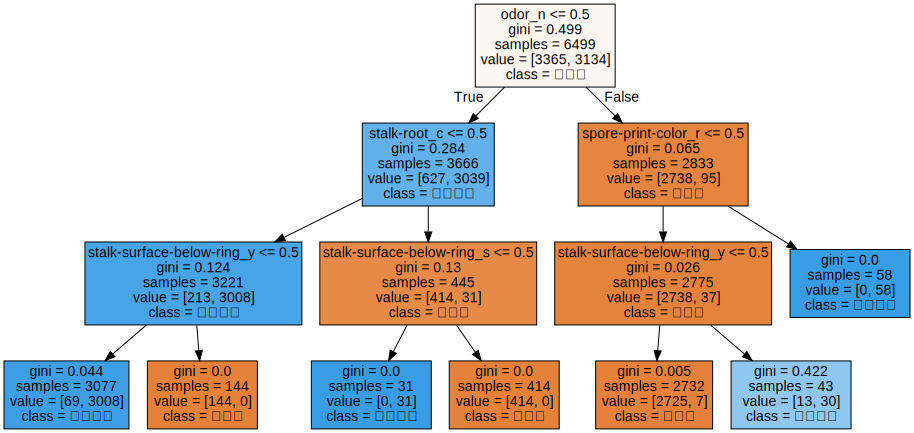

In [38]:
with open('/content/tree2.dot', encoding='UTF8') as f:
  dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 파라미터 : max_depth = 3 , min_samples_split = 100

In [ ]:
# 1. 모델 객체 생성  tree_model1,tree_model2,tree_model3

In [ ]:
# 2. 모델 학습

In [ ]:
# 3. 모델 score
#score1 =
#score2 =
#score3 =

In [ ]:
# 4. 예측 predict

In [ ]:
# 5. 평가 accuracy_score(실제답,예측답)

In [ ]:
# 6. 모델 트리생성

In [39]:
type(X_ohe)

pandas.core.frame.DataFrame

In [40]:
X_ohe.corr()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,...,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,...,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,...,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,...,-0.089360,0.172707,-0.170081,-0.089230,-0.113404,0.235108,-0.065047,0.090538,-0.073380,0.119003
cap-shape_s,-0.015264,-0.001396,-0.050070,-0.021185,1.000000,-0.056884,0.099464,-0.001396,-0.042607,-0.051272,...,-0.026791,0.000341,0.044603,-0.050018,-0.037702,-0.021242,-0.012142,-0.025458,0.288697,-0.009784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
habitat_l,0.010113,0.065707,-0.052326,0.235108,-0.021242,-0.096639,-0.191987,0.065707,0.190799,-0.006819,...,-0.143906,0.248675,-0.174539,-0.268668,-0.202512,1.000000,-0.065222,-0.136749,-0.073577,-0.052553
habitat_m,0.374316,-0.004286,-0.129312,-0.065047,-0.012142,-0.004529,-0.122077,-0.004286,0.077081,0.039697,...,0.152473,-0.144434,-0.099772,-0.153579,-0.115762,-0.065222,1.000000,-0.078170,-0.042059,-0.030041
habitat_p,-0.095178,-0.008985,0.021891,0.090538,-0.025458,-0.029042,-0.086727,-0.008985,-0.039574,0.117915,...,-0.125366,0.169228,0.040714,-0.322005,-0.242715,-0.136749,-0.078170,1.000000,-0.088184,-0.062986
habitat_u,-0.052871,-0.004835,0.030636,-0.073380,0.288697,0.002845,-0.011913,-0.004835,0.117548,-0.100248,...,0.130450,0.001180,-0.042888,-0.173254,-0.130592,-0.073577,-0.042059,-0.088184,1.000000,-0.033889


In [47]:
feature_importance = tree_model.feature_importances_
feature_importance


array([0.00000000e+00, 6.14677884e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.84133375e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.81129846e-03, 2.08496841e-02, 0.00000000e+00,
       0.00000000e+00, 2.07185814e-02, 0.00000000e+00, 6.23110349e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.54420318e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.79952492e-01, 0.00000000e+00, 0.00000000e+00,
      

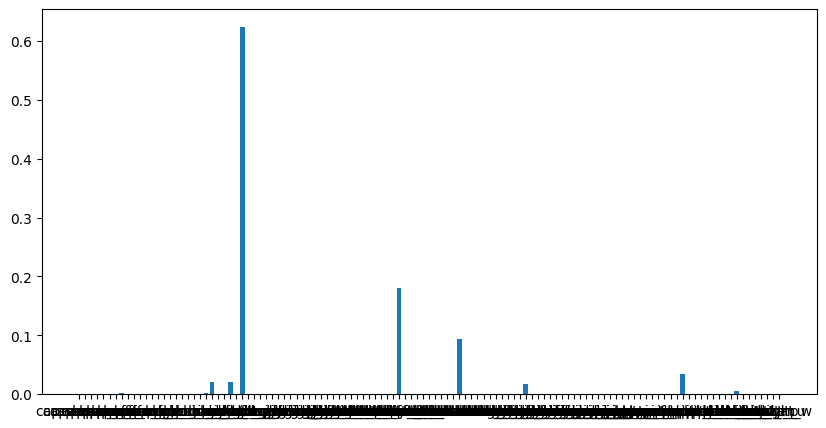

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.bar(X_ohe.columns,feature_importance)
plt.show()